In [1]:
!git clone https://github.com/yu-gi-oh-leilei/ML-GCN_cvpr2019.git

Cloning into 'ML-GCN_cvpr2019'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 51 (delta 12), reused 49 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 1.70 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
!git clone https://github.com/megvii-research/ML-GCN.git

Cloning into 'ML-GCN'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 57 (delta 10), reused 9 (delta 9), pack-reused 39 (from 1)
Receiving objects: 100% (57/57), 133.20 KiB | 16.65 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [21]:
%cd ../ML-GCN_cvpr2019/models

/content/ML-GCN_cvpr2019/models


https://github.com/yu-gi-oh-leilei/ML-GCN_cvpr2019/blob/bf185ae95bb91242eae71ad9a637c795f12bbfa5/images/framework.png

<img src="https://raw.githubusercontent.com/yu-gi-oh-leilei/ML-GCN_cvpr2019/bf185ae95bb91242eae71ad9a637c795f12bbfa5/images/framework.png" width="800">

In [2]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Load PASCAL VOC dataset
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor()])
voc_dataset = torchvision.datasets.VOCDetection(root="data", year="2007", image_set="train", download=True, transform=transform)

# Create DataLoader
voc_loader = DataLoader(voc_dataset, batch_size=1, shuffle=True)

# Check one sample
image, target = next(iter(voc_loader))
print("Image shape:", image.shape)
print("Labels:", target)


Using downloaded and verified file: data/VOCtrainval_06-Nov-2007.tar
Extracting data/VOCtrainval_06-Nov-2007.tar to data
Image shape: torch.Size([1, 3, 448, 448])
Labels: {'annotation': {'folder': ['VOC2007'], 'filename': ['006844.jpg'], 'source': {'database': ['The VOC2007 Database'], 'annotation': ['PASCAL VOC2007'], 'image': ['flickr'], 'flickrid': ['309254047']}, 'owner': {'flickrid': ['stuffeducks'], 'name': ['r.c. reyes']}, 'size': {'width': ['500'], 'height': ['375'], 'depth': ['3']}, 'segmented': ['0'], 'object': [{'name': ['train'], 'pose': ['Left'], 'truncated': ['0'], 'difficult': ['0'], 'bndbox': {'xmin': ['87'], 'ymin': ['105'], 'xmax': ['492'], 'ymax': ['237']}}]}}


In [5]:
!gdown --id 1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA -O checkpoint/voc_checkpoint.pth


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA
From (redirected): https://drive.google.com/uc?id=1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA&confirm=t&uuid=8c4d5781-2769-49ba-ade6-38cdb26cc4d0
To: /content/ML-GCN/checkpoint/voc_checkpoint.pth
100% 180M/180M [00:06<00:00, 29.5MB/s]


In [24]:
import torch
from torchvision import models
from mlgcn import MLGCN  # Import your custom MLGCN model

# Load ResNet-101 as the backbone
resnet101 = models.resnet101(pretrained=True)

# Define the number of classes for PASCAL VOC
num_classes = 20

# Define word feature path (modify as needed)
word_feature_path = "/content/ML-GCN_cvpr2019/wordfeature"

# Initialize MLGCN
model = MLGCN(resnet101, num_classes=num_classes, word_feature_path=word_feature_path)

# Load pre-trained checkpoint
checkpoint_path = "/content/ML-GCN_cvpr2019/checkpoint/voc_checkpoint.pth"
checkpoint = torch.load(checkpoint_path, map_location="cpu")
model.load_state_dict(checkpoint["state_dict"])

# Set model to evaluation mode
model.eval()

print("Custom MLGCN model loaded successfully!")


graph input: loaded from /content/ML-GCN_cvpr2019/wordfeature/voc_glove_word2vec.pkl
Custom MLGCN model loaded successfully!


<ipython-input-24-f4668afafc15>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location="cpu")


007383.jpeg

Loaded Image: 000516.jpg


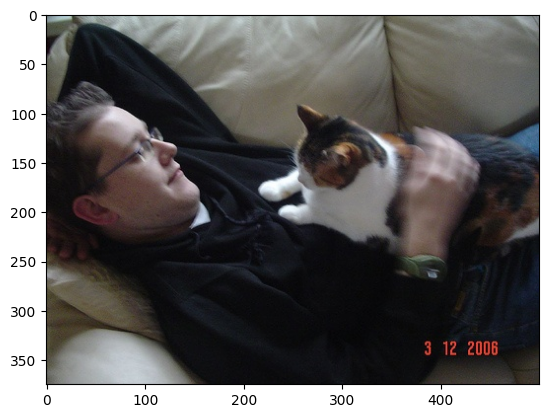

In [33]:
import random
from PIL import Image
import os
import matplotlib.pyplot as plt
# VOC 2007 label list
voc_labels = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Path to VOC 2007 images
image_folder = "/content/ML-GCN/data/VOCdevkit/VOC2007/JPEGImages"  # Modify if needed

# Pick a random image from the dataset
image_filename = random.choice(os.listdir(image_folder))
image_path = os.path.join(image_folder, image_filename)

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

print(f"Loaded Image: {image_filename}")
plt.imshow(image)
plt.show()

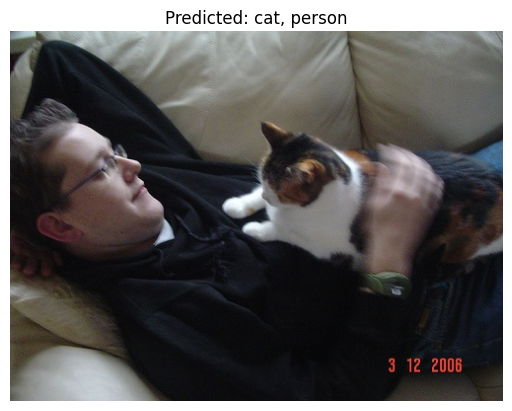

In [34]:
import matplotlib.pyplot as plt

# Run inference on the uploaded image
with torch.no_grad():
    image_tensor = image_tensor.cuda()  # Move image_tensor to GPU
    model = model.cuda()
    outputs = model(image_tensor)
    predictions = torch.sigmoid(outputs).squeeze().cpu().numpy()

# PASCAL VOC label list
voc_labels = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Get predicted labels with confidence threshold (0.5)
predicted_labels = [voc_labels[i] for i, score in enumerate(predictions) if score > 0.3]

# Show image with title
plt.imshow(image)
plt.title(f"Predicted: {', '.join(predicted_labels)}")
plt.axis("off")
plt.show()
